# L6: Tool Use

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
from anthropic import Anthropic

In [2]:
# Load environment variables
from helper import load_env
load_env()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [3]:
MODEL_NAME="claude-3-5-sonnet-20241022"
client = Anthropic()

## Tool Use Flow

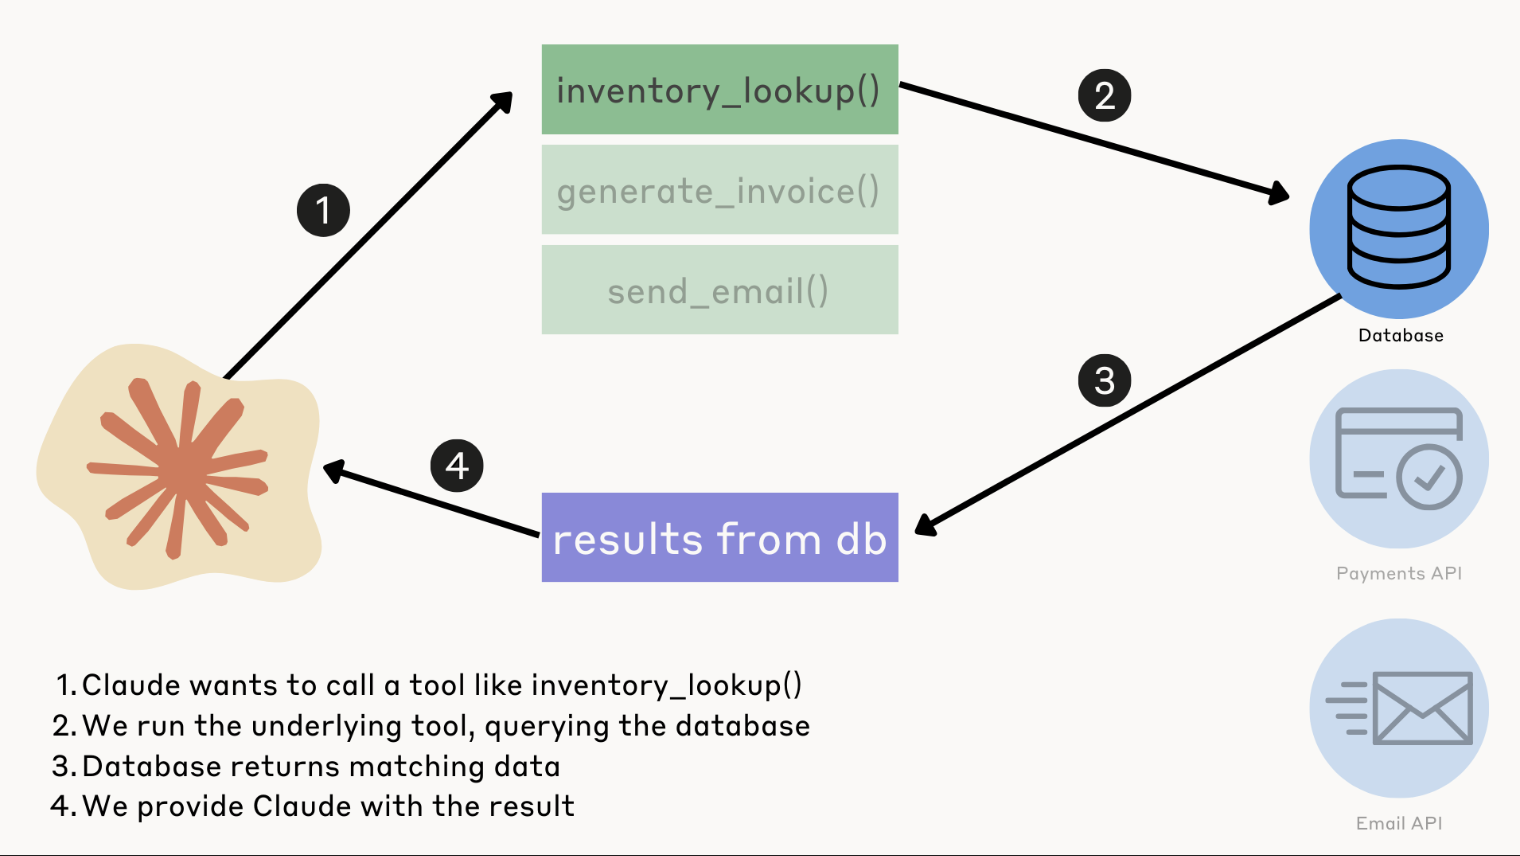

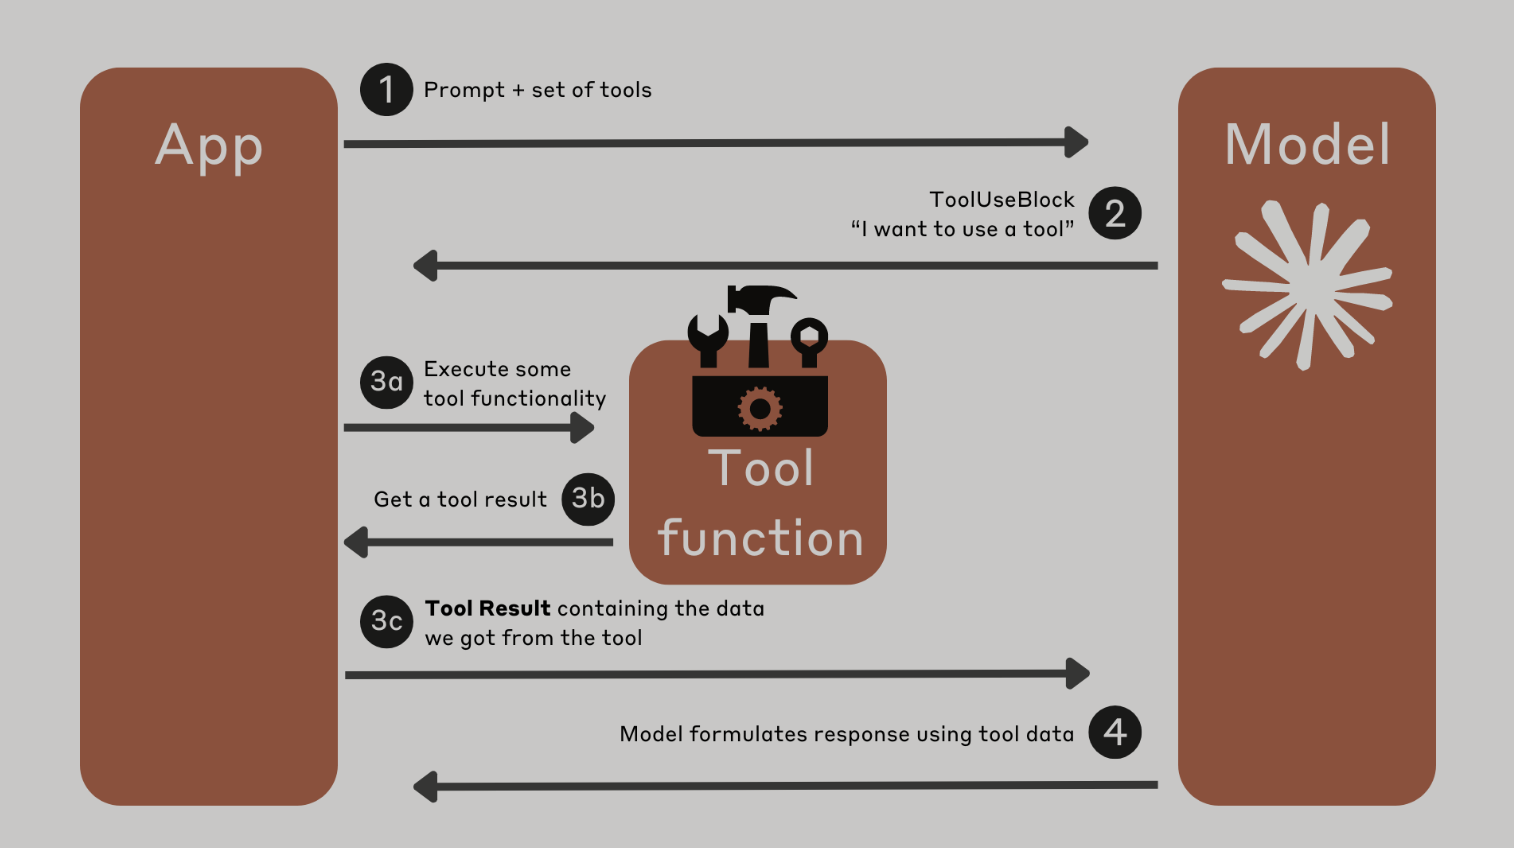

## Our Fake Database

In [4]:
class FakeDatabase:
    def __init__(self):
        self.customers = [
            {"id": "1213210", "name": "John Doe", "email": "john@gmail.com", "phone": "123-456-7890", "username": "johndoe"},
            {"id": "2837622", "name": "Priya Patel", "email": "priya@candy.com", "phone": "987-654-3210", "username": "priya123"},
            {"id": "3924156", "name": "Liam Nguyen", "email": "lnguyen@yahoo.com", "phone": "555-123-4567", "username": "liamn"},
            {"id": "4782901", "name": "Aaliyah Davis", "email": "aaliyahd@hotmail.com", "phone": "111-222-3333", "username": "adavis"},
            {"id": "5190753", "name": "Hiroshi Nakamura", "email": "hiroshi@gmail.com", "phone": "444-555-6666", "username": "hiroshin"},
            {"id": "6824095", "name": "Fatima Ahmed", "email": "fatimaa@outlook.com", "phone": "777-888-9999", "username": "fatimaahmed"},
            {"id": "7135680", "name": "Alejandro Rodriguez", "email": "arodriguez@protonmail.com", "phone": "222-333-4444", "username": "alexr"},
            {"id": "8259147", "name": "Megan Anderson", "email": "megana@gmail.com", "phone": "666-777-8888", "username": "manderson"},
            {"id": "9603481", "name": "Kwame Osei", "email": "kwameo@yahoo.com", "phone": "999-000-1111", "username": "kwameo"},
            {"id": "1057426", "name": "Mei Lin", "email": "meilin@gmail.com", "phone": "333-444-5555", "username": "mlin"}
        ]

        self.orders = [
            {"id": "24601", "customer_id": "1213210", "product": "Wireless Headphones", "quantity": 1, "price": 79.99, "status": "Shipped"},
            {"id": "13579", "customer_id": "1213210", "product": "Smartphone Case", "quantity": 2, "price": 19.99, "status": "Processing"},
            {"id": "97531", "customer_id": "2837622", "product": "Bluetooth Speaker", "quantity": 1, "price": "49.99", "status": "Shipped"}, 
            {"id": "86420", "customer_id": "3924156", "product": "Fitness Tracker", "quantity": 1, "price": 129.99, "status": "Delivered"},
            {"id": "54321", "customer_id": "4782901", "product": "Laptop Sleeve", "quantity": 3, "price": 24.99, "status": "Shipped"},
            {"id": "19283", "customer_id": "5190753", "product": "Wireless Mouse", "quantity": 1, "price": 34.99, "status": "Processing"},
            {"id": "74651", "customer_id": "6824095", "product": "Gaming Keyboard", "quantity": 1, "price": 89.99, "status": "Delivered"},
            {"id": "30298", "customer_id": "7135680", "product": "Portable Charger", "quantity": 2, "price": 29.99, "status": "Shipped"},
            {"id": "47652", "customer_id": "8259147", "product": "Smartwatch", "quantity": 1, "price": 199.99, "status": "Processing"},
            {"id": "61984", "customer_id": "9603481", "product": "Noise-Cancelling Headphones", "quantity": 1, "price": 149.99, "status": "Shipped"},
            {"id": "58243", "customer_id": "1057426", "product": "Wireless Earbuds", "quantity": 2, "price": 99.99, "status": "Delivered"},
            {"id": "90357", "customer_id": "1213210", "product": "Smartphone Case", "quantity": 1, "price": 19.99, "status": "Shipped"},
            {"id": "28164", "customer_id": "2837622", "product": "Wireless Headphones", "quantity": 2, "price": 79.99, "status": "Processing"}
        ]

    def get_user(self, key, value):
        if key in {"email", "phone", "username"}:
            for customer in self.customers:
                if customer[key] == value:
                    return customer
            return f"Couldn't find a user with {key} of {value}"
        else:
            raise ValueError(f"Invalid key: {key}")
        
        return None

    def get_order_by_id(self, order_id):
        for order in self.orders:
            if order["id"] == order_id:
                return order
        return None
    
    def get_customer_orders(self, customer_id):
        return [order for order in self.orders if order["customer_id"] == customer_id]

    def cancel_order(self, order_id):
        order = self.get_order_by_id(order_id)
        if order:
            if order["status"] == "Processing":
                order["status"] = "Cancelled"
                return "Cancelled the order"
            else:
                return "Order has already shipped.  Can't cancel it."
        return "Can't find that order!"

In [5]:
db = FakeDatabase()

In [6]:
db.get_user("email","john@gmail.com")

{'id': '1213210',
 'name': 'John Doe',
 'email': 'john@gmail.com',
 'phone': '123-456-7890',
 'username': 'johndoe'}

In [7]:
db.get_customer_orders('1213210')

[{'id': '24601',
  'customer_id': '1213210',
  'product': 'Wireless Headphones',
  'quantity': 1,
  'price': 79.99,
  'status': 'Shipped'},
 {'id': '13579',
  'customer_id': '1213210',
  'product': 'Smartphone Case',
  'quantity': 2,
  'price': 19.99,
  'status': 'Processing'},
 {'id': '90357',
  'customer_id': '1213210',
  'product': 'Smartphone Case',
  'quantity': 1,
  'price': 19.99,
  'status': 'Shipped'}]

In [8]:
db.cancel_order('13579')

'Cancelled the order'

## Defining Tool Schemas

In [9]:
{
    "name": "get_user",
    "description": "Looks up a user by email, phone, or username.",
    "input_schema": {
        "type": "object",
        "properties": {
            "key": {
                "type": "string",
                "enum": ["email", "phone", "username"],
                "description": "The attribute to search for a user by (email, phone, or username)."
            },
            "value": {
                "type": "string",
                "description": "The value to match for the specified attribute."
            }
        },
        "required": ["key", "value"]
    }
}

{'name': 'get_user',
 'description': 'Looks up a user by email, phone, or username.',
 'input_schema': {'type': 'object',
  'properties': {'key': {'type': 'string',
    'enum': ['email', 'phone', 'username'],
    'description': 'The attribute to search for a user by (email, phone, or username).'},
   'value': {'type': 'string',
    'description': 'The value to match for the specified attribute.'}},
  'required': ['key', 'value']}}

## All Four Tools

In [10]:
tools = [
    {
        "name": "get_user",
        "description": "Looks up a user by email, phone, or username.",
        "input_schema": {
            "type": "object",
            "properties": {
                "key": {
                    "type": "string",
                    "enum": ["email", "phone", "username"],
                    "description": "The attribute to search for a user by (email, phone, or username)."
                },
                "value": {
                    "type": "string",
                    "description": "The value to match for the specified attribute."
                }
            },
            "required": ["key", "value"]
        }
    },
    {
        "name": "get_order_by_id",
        "description": "Retrieves the details of a specific order based on the order ID. Returns the order ID, product name, quantity, price, and order status.",
        "input_schema": {
            "type": "object",
            "properties": {
                "order_id": {
                    "type": "string",
                    "description": "The unique identifier for the order."
                }
            },
            "required": ["order_id"]
        }
    },
    {
        "name": "get_customer_orders",
        "description": "Retrieves the list of orders belonging to a user based on a user's customer id.",
        "input_schema": {
            "type": "object",
            "properties": {
                "customer_id": {
                    "type": "string",
                    "description": "The customer_id belonging to the user"
                }
            },
            "required": ["customer_id"]
        }
    },
    {
        "name": "cancel_order",
        "description": "Cancels an order based on a provided order_id.  Only orders that are 'processing' can be cancelled",
        "input_schema": {
            "type": "object",
            "properties": {
                "order_id": {
                    "type": "string",
                    "description": "The order_id pertaining to a particular order"
                }
            },
            "required": ["order_id"]
        }
    }
]

## Giving Claude Tools

In [11]:
messages = [
    {
        "role": "user",
        "content": "Show me my orders.  My username is priya123"
    }
]
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=4096,
    tools=tools,
    messages=messages
)

In [12]:
print(response.content)

[TextBlock(text="I'll help you look up your orders. Let me first get your user information using your username, and then I'll retrieve your orders.", type='text'), ToolUseBlock(id='toolu_01Qg7pTwe6sFUibahBNn3YaJ', input={'key': 'username', 'value': 'priya123'}, name='get_user', type='tool_use')]


In [13]:
print(response.content[-1])

ToolUseBlock(id='toolu_01Qg7pTwe6sFUibahBNn3YaJ', input={'key': 'username', 'value': 'priya123'}, name='get_user', type='tool_use')


In [14]:
def process_tool_call(tool_name, tool_input):
    if tool_name == "get_user":
        return db.get_user(tool_input["key"], tool_input["value"])
    elif tool_name == "get_order_by_id":
        return db.get_order_by_id(tool_input["order_id"])
    elif tool_name == "get_customer_orders":
        return db.get_customer_orders(tool_input["customer_id"])
    elif tool_name == "cancel_order":
        return db.cancel_order(tool_input["order_id"])

In [15]:
tool_use = response.content[-1] 
tool_name = tool_use.name
tool_input = tool_use.input

In [16]:
tool_result = process_tool_call(tool_name, tool_input)

In [17]:
{
    "role": "user",
    "content": [
        {
            "type": "tool_result",
            "tool_use_id": tool_use.id,
            "content": str(tool_result),
        }
    ],
}

{'role': 'user',
 'content': [{'type': 'tool_result',
   'tool_use_id': 'toolu_01Qg7pTwe6sFUibahBNn3YaJ',
   'content': "{'id': '2837622', 'name': 'Priya Patel', 'email': 'priya@candy.com', 'phone': '987-654-3210', 'username': 'priya123'}"}]}

## The Complete Chatbot

In [18]:
import re
def extract_reply(text):
    pattern = r'<reply>(.*?)</reply>'
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None    
    
def simple_chat():
    system_prompt = """
    You are a customer support chat bot for an online retailer
    called Acme Co.Your job is to help users look up their account, 
    orders, and cancel orders.Be helpful and brief in your responses.
    You have access to a set of tools, but only use them when needed.  
    If you do not have enough information to use a tool correctly, 
    ask a user follow up questions to get the required inputs.
    Do not call any of the tools unless you have the required 
    data from a user. 

    In each conversational turn, you will begin by thinking about 
    your response. Once you're done, you will write a user-facing 
    response. It's important to place all user-facing conversational 
    responses in <reply></reply> XML tags to make them easy to parse.
    """
    user_message = input("\nUser: ")
    messages = [{"role": "user", "content": user_message}]
    while True:
        if user_message == "quit":
            break
        #If the last message is from the assistant, 
        # get another input from the user
        if messages[-1].get("role") == "assistant":
            user_message = input("\nUser: ")
            messages.append({"role": "user", "content": user_message})

        #Send a request to Claude
        response = client.messages.create(
            model=MODEL_NAME,
            system=system_prompt,
            max_tokens=4096,
            tools=tools,
            messages=messages
        )
        # Update messages to include Claude's response
        messages.append(
            {"role": "assistant", "content": response.content}
        )

        #If Claude stops because it wants to use a tool:
        if response.stop_reason == "tool_use":
            #Naive approach assumes only 1 tool is called at a time
            tool_use = response.content[-1] 
            tool_name = tool_use.name
            tool_input = tool_use.input
            print(f"=====Claude wants to use the {tool_name} tool=====")


            #Actually run the underlying tool functionality on our db
            tool_result = process_tool_call(tool_name, tool_input)

            #Add our tool_result message:
            messages.append(
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "tool_result",
                            "tool_use_id": tool_use.id,
                            "content": str(tool_result),
                        }
                    ],
                },
            )
        else: 
            #If Claude does NOT want to use a tool, 
            #just print out the text reponse
            model_reply = extract_reply(response.content[0].text)
            print("\nAcme Co Support: " + f"{model_reply}" )

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [19]:
simple_chat()


User: hello!

Acme Co Support: Hello! I'm Acme Co's customer service assistant. I can help you look up your account information, check on your orders, or help cancel an order. How can I assist you today?

User: I want to check on my order status

Acme Co Support: I'd be happy to help you check on your order status. I can look this up in two ways:
1. With a specific order ID
2. By looking up all orders linked to your account (using your email, phone, or username)

Which would you prefer?

User: I have my username which is priya123
=====Claude wants to use the get_user tool=====
=====Claude wants to use the get_customer_orders tool=====

Acme Co Support: I found your orders, Priya! You have 2 recent orders:
1. Order #97531: 1 Bluetooth Speaker ($49.99) - Status: Shipped
2. Order #28164: 2 Wireless Headphones ($79.99) - Status: Processing

Would you like any specific details about either of these orders?

User: quit

Acme Co Support: Thank you for chatting with Acme Co's customer service